In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 

In [8]:
customer_data = pd.read_csv('/Users/arpit_lal/Desktop/Mall_Customers.csv')

In [10]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
customer_data.shape

(200, 5)

In [14]:
X = customer_data.iloc[:,[3,4]].values

In [16]:
print (X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [20]:
# Choosing the correct no. of clusters 
# WCSS = within cluster sum of square

# Finding wcss values for different no. of clusters  

wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

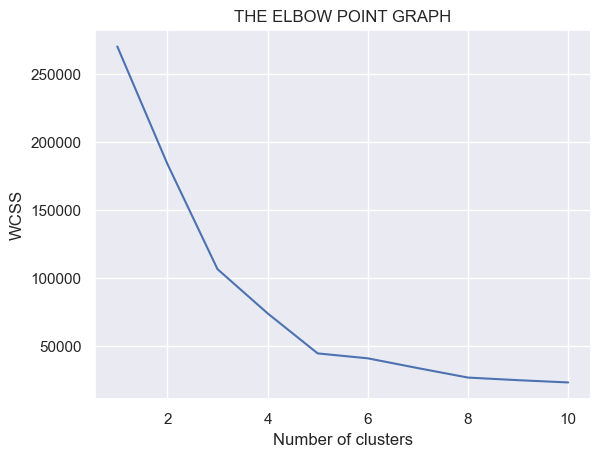

In [24]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW POINT GRAPH')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
#Optimum no. of cluster = 5 
#Trainig the Kmeans clustering model

kmeans = KMeans(n_clusters=5, init = 'k-means++',random_state=0)

#return a label for each data point based on thei cluster 

Y = kmeans.fit_predict(X)
print(Y)
# 5 clusters are 0,1,2,3,4

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


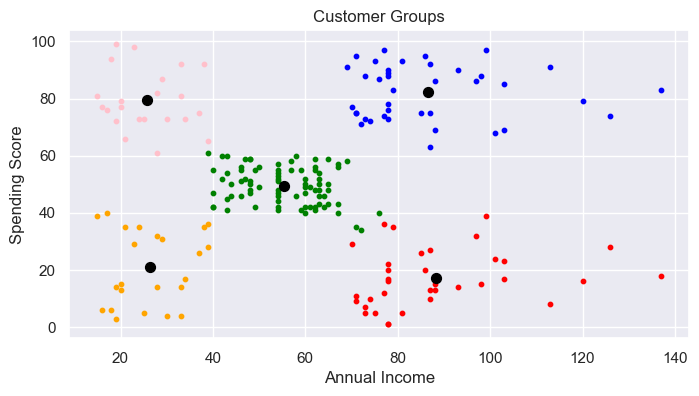

In [46]:
# Visualiding all the cluster

plt.figure(figsize=(8,4))
plt.scatter(X[Y==0,0], X[Y==0,1], s=10, c='green', label = 'cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=10, c='blue', label = 'cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=10, c='red', label = 'cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=10, c='orange', label = 'cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=10, c='pink', label = 'cluster 5')

# Plotting the centroid 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='black', label= 'centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

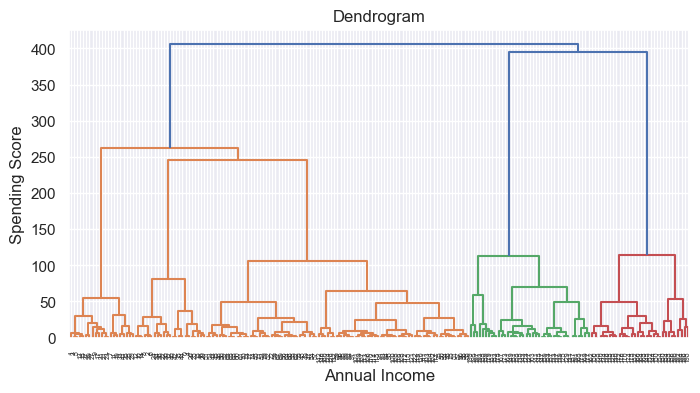

In [48]:
import scipy.cluster.hierarchy as sch 
plt.figure(figsize =(8,4))

dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [50]:
from sklearn.metrics import silhouette_score

In [54]:
silhouette_score(X,Y)

0.553931997444648